In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from datetime import datetime, timedelta

In [2]:
#reading dataset
berlin_df = pd.read_csv('berlin-houses.csv') 
berlin_df.head()

,id,lat,lon,cold_price,currency,short_listed,postcode_id,balcony,builtin_kitchen,created_date,...,published_date,warm_price,address,link,quarter,garden,listing_type,localhost_date,no_longer_available,no_longer_available_date
0,108076043,52.54692,13.39993,954.83,EUR,False,13355,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,False,NaN,2019-04-13 21:28:29.524733,True,2019-06-19 20:59:47.343696
1,109645532,52.46982,13.43096,425.98,EUR,False,12051,True,False,2019-01-30 13:48:26.000000,...,2019-01-30 13:48:26.000000,630.98,"Schierker Straße 31, Neukölln (Neukölln), Berlin",https://www.immobilienscout24.de/expose/109645532,Neukölln (Neukölln),False,S,2019-04-13 21:28:30.204815,True,2019-06-21 06:36:13.552834
2,108077960,52.54727,13.39899,769.99,EUR,False,13355,True,True,2018-10-30 12:28:47.000000,...,2018-10-30 12:28:47.000000,952.47,"Lichtburgring 4, Wedding (Wedding), Berlin",https://www.immobilienscout24.de/expose/108077960,Wedding (Wedding),False,M,2019-04-13 21:28:29.522283,True,2019-06-19 20:59:47.345571
3,109503935,52.51210,13.46197,949.00,EUR,False,10245,False,False,2019-01-23 11:32:09.000000,...,2019-01-23 11:32:09.000000,1139.00,"Boxhagener Str. 98, Friedrichshain (Friedrichs...",https://www.immobilienscout24.de/expose/109503935,Friedrichshain (Friedrichshain),False,M,2019-04-13 21:28:29.538720,True,2019-06-19 20:59:47.352013
4,110143024,52.50508,13.38592,559.96,EUR,False,10963,True,False,2019-02-27 08:55:20.000000,...,2019-02-27 08:55:20.000000,735.51,"Anhalterstraße 11, Kreuzberg (Kreuzberg), Berlin",https://www.immobilienscout24.de/expose/110143024,Kreuzberg (Kreuzberg),False,S,2019-04-13 21:28:30.185993,True,2019-06-19 20:59:47.359163


# Data Preprocessing

In [3]:
#fetching information about dataset
berlin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1038 non-null   int64  
 1   lat                       1038 non-null   float64
 2   lon                       1038 non-null   float64
 3   cold_price                1038 non-null   float64
 4   currency                  1038 non-null   object 
 5   short_listed              1038 non-null   bool   
 6   postcode_id               1038 non-null   int64  
 7   balcony                   1038 non-null   bool   
 8   builtin_kitchen           1038 non-null   bool   
 9   created_date              1001 non-null   object 
 10  energy_certificate        1038 non-null   bool   
 11  has_new_flag              1038 non-null   bool   
 12  living_space              1018 non-null   float64
 13  new_home_builder          1038 non-null   bool   
 14  number_r

In [4]:
berlin_df.isnull().any() #checking for null values

id                          False
lat                         False
lon                         False
cold_price                  False
currency                    False
short_listed                False
postcode_id                 False
balcony                     False
builtin_kitchen             False
created_date                 True
energy_certificate          False
has_new_flag                False
living_space                 True
new_home_builder            False
number_rooms                 True
private_offer               False
modified_date                True
published_date               True
warm_price                   True
address                      True
link                         True
quarter                      True
garden                      False
listing_type                 True
localhost_date              False
no_longer_available         False
no_longer_available_date     True
dtype: bool

In [5]:
#to fetch the attributes of the dataset
berlin_df.columns

Index(['id', 'lat', 'lon', 'cold_price', 'currency', 'short_listed',
       'postcode_id', 'balcony', 'builtin_kitchen', 'created_date',
       'energy_certificate', 'has_new_flag', 'living_space',
       'new_home_builder', 'number_rooms', 'private_offer', 'modified_date',
       'published_date', 'warm_price', 'address', 'link', 'quarter', 'garden',
       'listing_type', 'localhost_date', 'no_longer_available',
       'no_longer_available_date'],
      dtype='object')

In [6]:
berlin_df['number_rooms'].head(15)

0     NaN
1     2.0
2     2.0
3     2.0
4     2.0
5     4.0
6     2.0
7     2.0
8     2.0
9     2.0
10    2.0
11    2.0
12    2.0
13    2.0
14    2.0
Name: number_rooms, dtype: float64

In [7]:
#describes the dataframe(central tendency,variation,quartile ranges,maximun and minimum)
berlin_df.describe()

,id,lat,lon,cold_price,postcode_id,living_space,number_rooms,warm_price
count,1.038000e+03,1038.000000,1038.000000,1038.000000,1038.000000,1018.000000,1018.000000,1018.000000
mean,1.093818e+08,52.509401,13.423467,787.479653,10851.175337,63.034656,2.212181,966.603143
std,9.737607e+06,0.020471,0.030168,192.510034,831.004776,18.337413,0.477795,218.588139
min,3.140399e+07,52.467010,13.339400,0.000000,10099.000000,40.000000,2.000000,100.000000
25%,1.110968e+08,52.497450,13.400535,666.860000,10245.000000,53.500000,2.000000,817.250000
50%,1.122059e+08,52.508770,13.424590,800.000000,10435.000000,59.930000,2.000000,970.000000
75%,1.125261e+08,52.524010,13.447400,949.000000,10969.000000,69.175000,2.000000,1130.000000
max,1.127994e+08,52.549230,13.494310,1100.000000,13357.000000,456.000000,5.000000,1621.520000


In [8]:
#returns counts of unique values in column number_rooms
berlin_df['number_rooms'].value_counts()

2.0    831
3.0    160
4.0     25
5.0      2
Name: number_rooms, dtype: int64

In [9]:
#returns count of unique values in different quarters
berlin_df['quarter'].value_counts()

Friedrichshain (Friedrichshain)      267
Kreuzberg (Kreuzberg)                204
Neukölln (Neukölln)                  161
Mitte (Mitte)                        147
Prenzlauer Berg (Prenzlauer Berg)    134
Wedding (Wedding)                     29
Schöneberg (Schöneberg)               28
Lichtenberg (Lichtenberg)             17
Treptow (Treptow)                     15
Tiergarten (Tiergarten)               15
Plänterwald (Treptow)                  1
Name: quarter, dtype: int64

C:\Users\avanish\AppData\Local\Temp\ipykernel_9680\2743250281.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(berlin_df.corr(), annot=True , fmt=".2f", annot_kws={'fontsize':11, 'fontweight':'bold'})


<AxesSubplot: >

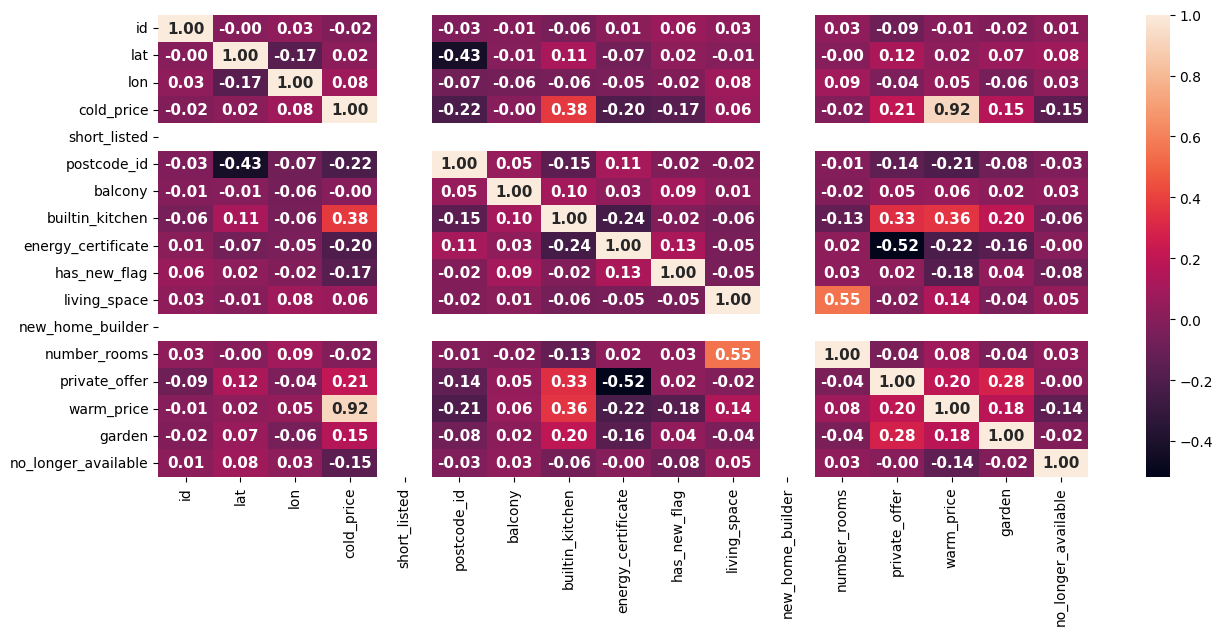

In [10]:
#pearson correlation to describe strength and direction of relationship between two variables
plt.figure(figsize=(15,6))
sns.heatmap(berlin_df.corr(), annot=True , fmt=".2f", annot_kws={'fontsize':11, 'fontweight':'bold'})

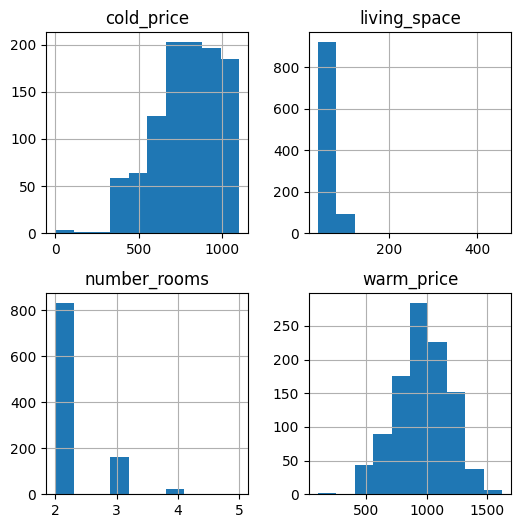

In [11]:
#graphically representing quantitative data using histogram
berlin_df[['cold_price', 'living_space', 'number_rooms', 'warm_price']].hist(figsize=(6, 6));

In [12]:
berlin_df.listing_type.value_counts()

S     758
M     228
L      27
XL      5
Name: listing_type, dtype: int64

In [13]:
berlin_df.balcony.value_counts()

True     632
False    406
Name: balcony, dtype: int64

In [14]:
berlin_df.builtin_kitchen.value_counts()

False    578
True     460
Name: builtin_kitchen, dtype: int64

In [15]:
berlin_df.garden.value_counts()

False    975
True      63
Name: garden, dtype: int64

In [16]:
berlin_df.living_space.value_counts()

60.00    24
55.00    20
70.00    18
50.00    15
62.00    15
         ..
59.04     1
85.26     1
56.33     1
90.22     1
52.39     1
Name: living_space, Length: 539, dtype: int64

<AxesSubplot: >

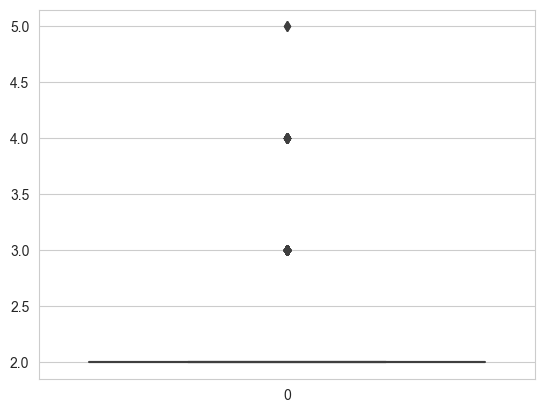

In [17]:
sns.set_style('whitegrid')
sns.boxplot(berlin_df.number_rooms) 

In [18]:
berlin_df.number_rooms.describe()

count    1018.000000
mean        2.212181
std         0.477795
min         2.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: number_rooms, dtype: float64

<AxesSubplot: xlabel='builtin_kitchen', ylabel='living_space'>

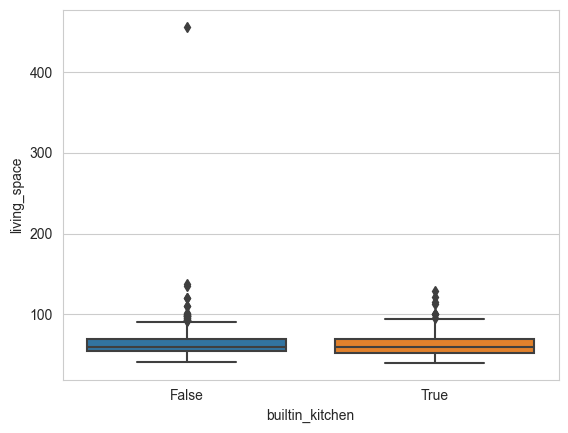

In [19]:
sns.boxplot(x= berlin_df.builtin_kitchen, y=berlin_df.living_space)#using boxplot to find outliers

<AxesSubplot: xlabel='listing_type', ylabel='living_space'>

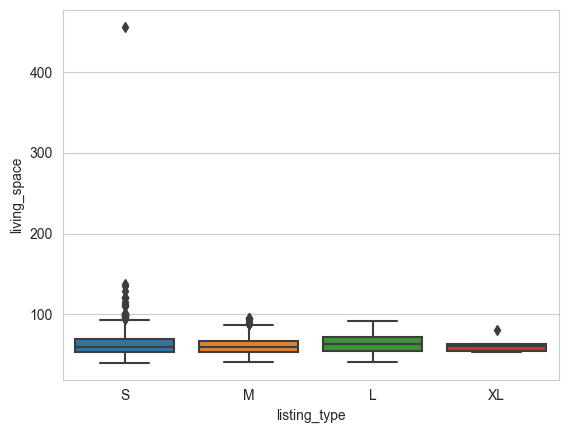

In [20]:
sns.boxplot(x= berlin_df.listing_type, y=berlin_df.living_space)

<AxesSubplot: xlabel='garden', ylabel='number_rooms'>

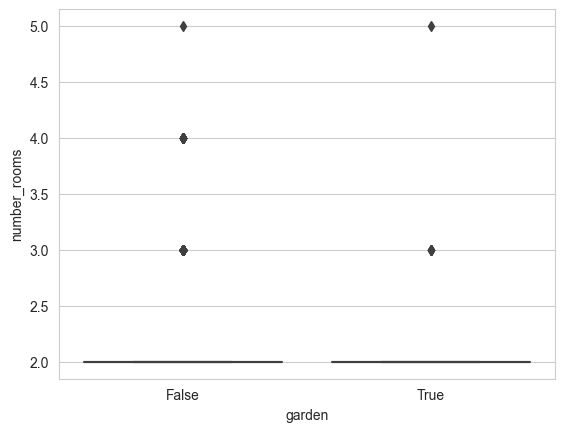

In [21]:
sns.boxplot(x = 'garden', y= 'number_rooms', data = berlin_df)

<AxesSubplot: xlabel='garden', ylabel='number_rooms'>

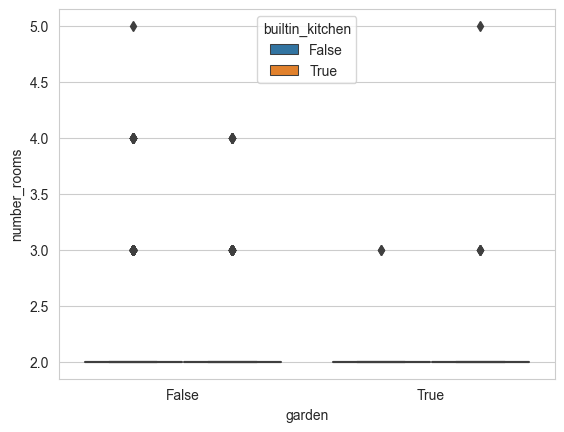

In [22]:
sns.boxplot(x = 'garden', y= 'number_rooms', hue='builtin_kitchen', data = berlin_df)

In [23]:
berlin_df['new_parameter'] = berlin_df.living_space > 50

<AxesSubplot: xlabel='balcony', ylabel='number_rooms'>

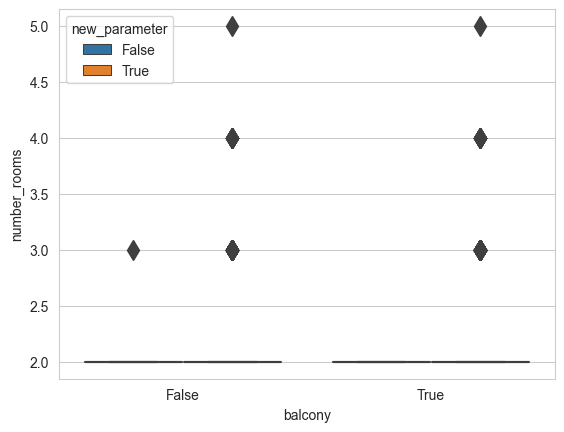

In [24]:
sns.boxplot(x='balcony', y='number_rooms' , hue='new_parameter' , data= berlin_df, fliersize=10)

In [25]:
#dropping unnecessary columns
new_df= berlin_df.drop(columns=['lat','lon','id','currency','short_listed','postcode_id','created_date','energy_certificate','new_home_builder',
                       'private_offer','modified_date','address', 'link','localhost_date'], axis=1)
new_df.head(5)

,cold_price,balcony,builtin_kitchen,has_new_flag,living_space,number_rooms,published_date,warm_price,quarter,garden,listing_type,no_longer_available,no_longer_available_date,new_parameter
0,954.83,False,False,False,NaN,NaN,NaN,NaN,NaN,False,NaN,True,2019-06-19 20:59:47.343696,False
1,425.98,True,False,False,59.00,2.0,2019-01-30 13:48:26.000000,630.98,Neukölln (Neukölln),False,S,True,2019-06-21 06:36:13.552834,True
2,769.99,True,True,False,51.98,2.0,2018-10-30 12:28:47.000000,952.47,Wedding (Wedding),False,M,True,2019-06-19 20:59:47.345571,True
3,949.00,False,False,False,80.00,2.0,2019-01-23 11:32:09.000000,1139.00,Friedrichshain (Friedrichshain),False,M,True,2019-06-19 20:59:47.352013,True
4,559.96,True,False,False,64.63,2.0,2019-02-27 08:55:20.000000,735.51,Kreuzberg (Kreuzberg),False,S,True,2019-06-19 20:59:47.359163,True


In [26]:
new_df.shape #fetches the dimension of the dataset

(1038, 14)

In [27]:
new_df.isnull().sum()#tracking missing or null values

cold_price                    0
balcony                       0
builtin_kitchen               0
has_new_flag                  0
living_space                 20
number_rooms                 20
published_date               37
warm_price                   20
quarter                      20
garden                        0
listing_type                 20
no_longer_available           0
no_longer_available_date    106
new_parameter                 0
dtype: int64

In [28]:
new_df.isnull().sum().sum() # to fetch total amount of null values in the dataset

243

# Handling Missing Values

In [29]:
#performing mean imputations for quantitative variables
cols = ['living_space', 'number_rooms','warm_price']
new_df[cols]=new_df[cols].fillna(new_df.mean())
new_df

C:\Users\avanish\AppData\Local\Temp\ipykernel_9680\1835275914.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_df[cols]=new_df[cols].fillna(new_df.mean())


,cold_price,balcony,builtin_kitchen,has_new_flag,living_space,number_rooms,published_date,warm_price,quarter,garden,listing_type,no_longer_available,no_longer_available_date,new_parameter
0,954.83,False,False,False,63.034656,2.212181,NaN,966.603143,NaN,False,NaN,True,2019-06-19 20:59:47.343696,False
1,425.98,True,False,False,59.000000,2.000000,2019-01-30 13:48:26.000000,630.980000,Neukölln (Neukölln),False,S,True,2019-06-21 06:36:13.552834,True
2,769.99,True,True,False,51.980000,2.000000,2018-10-30 12:28:47.000000,952.470000,Wedding (Wedding),False,M,True,2019-06-19 20:59:47.345571,True
3,949.00,False,False,False,80.000000,2.000000,2019-01-23 11:32:09.000000,1139.000000,Friedrichshain (Friedrichshain),False,M,True,2019-06-19 20:59:47.352013,True
4,559.96,True,False,False,64.630000,2.000000,2019-02-27 08:55:20.000000,735.510000,Kreuzberg (Kreuzberg),False,S,True,2019-06-19 20:59:47.359163,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,754.55,True,False,True,59.460000,2.000000,2019-07-25 04:01:31.000000,959.920000,Kreuzberg (Kreuzberg),False,S,True,2019-07-30 18:28:31.221004,True
1034,799.00,False,False,True,52.390000,2.000000,2019-07-25 06:38:43.000000,904.000000,Neukölln (Neukölln),False,S,False,NaN,True
1035,1050.00,False,False,True,70.000000,2.000000,2019-07-25 07:11:20.000000,1225.000000,Kreuzberg (Kreuzberg),False,S,True,2019-07-30 18:28:31.223843,True
1036,915.00,True,False,True,57.200000,2.000000,2019-07-25 06:49:59.000000,1043.000000,Neukölln (Neukölln),False,S,False,NaN,True


In [30]:
new_df.isnull().sum()

cold_price                    0
balcony                       0
builtin_kitchen               0
has_new_flag                  0
living_space                  0
number_rooms                  0
published_date               37
warm_price                    0
quarter                      20
garden                        0
listing_type                 20
no_longer_available           0
no_longer_available_date    106
new_parameter                 0
dtype: int64

In [31]:
new_df.isnull().sum().sum()

183

In [32]:
#converting listing_type to categorical type
new_df.number_rooms = new_df.number_rooms.apply(lambda x: int(x) if not pd.isnull(x) else x)

cat_var = pd.CategoricalDtype(categories=['S', 'M', 'L', 'XL'], ordered=True)

new_df['listing_type'] = new_df['listing_type'].astype(cat_var)

In [33]:
new_df[['number_rooms', 'listing_type']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   number_rooms  1038 non-null   int64   
 1   listing_type  1018 non-null   category
dtypes: category(1), int64(1)
memory usage: 9.4 KB


In [34]:
#finding category in quarter which occurs for the maximun no. of times 
new_df.quarter.mode()

0    Friedrichshain (Friedrichshain)
Name: quarter, dtype: object

<AxesSubplot: >

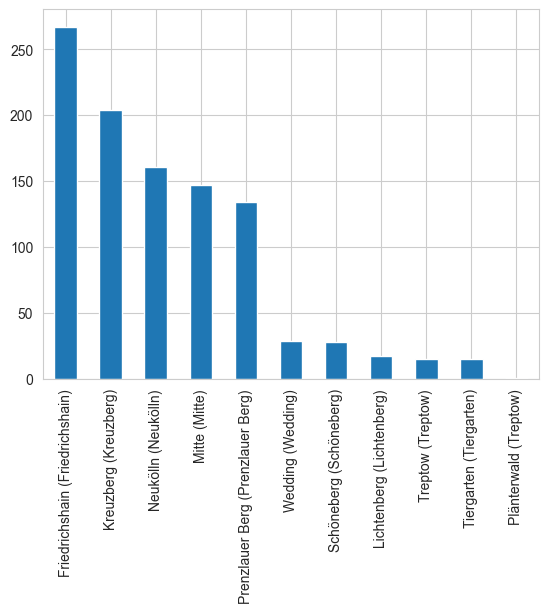

In [35]:
new_df.quarter.value_counts().plot.bar() #Friedrichshain occurs most frequently

In [36]:
new_df.listing_type.mode()

0    S
Name: listing_type, dtype: category
Categories (4, object): ['S' < 'M' < 'L' < 'XL']

<AxesSubplot: >

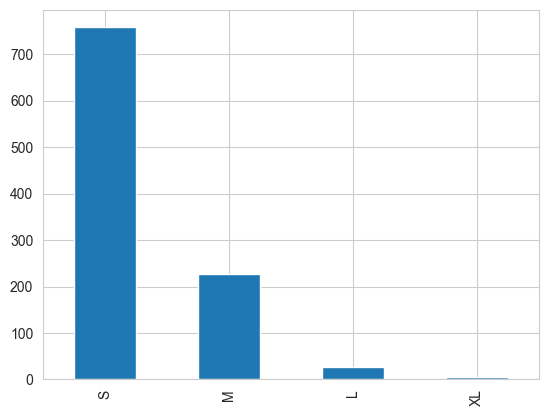

In [37]:
new_df.listing_type.value_counts().plot.bar()#category S appears most for attribute listing_type

In [38]:
#filling null values using mode
new_df['quarter'].fillna('Friedrichshain', inplace = True)
new_df['listing_type'].fillna('S', inplace = True)

In [39]:
new_df.isnull().sum()

cold_price                    0
balcony                       0
builtin_kitchen               0
has_new_flag                  0
living_space                  0
number_rooms                  0
published_date               37
warm_price                    0
quarter                       0
garden                        0
listing_type                  0
no_longer_available           0
no_longer_available_date    106
new_parameter                 0
dtype: int64

In [40]:
#converting published date and no_longer_available_date to type datetime
datetime_columns = ['published_date','no_longer_available_date']

for col in datetime_columns:
    new_df[col] = pd.to_datetime(new_df[col])

In [41]:
new_df[['published_date','no_longer_available_date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   published_date            1001 non-null   datetime64[ns]
 1   no_longer_available_date  932 non-null    datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 16.3 KB


In [42]:
#finding amount of time when the apartment was published
new_df['time_diff'] = new_df.no_longer_available_date - new_df.published_date

In [43]:
new_df.loc[0:10]

,cold_price,balcony,builtin_kitchen,has_new_flag,living_space,number_rooms,published_date,warm_price,quarter,garden,listing_type,no_longer_available,no_longer_available_date,new_parameter,time_diff
0,954.83,False,False,False,63.034656,2,NaT,966.603143,Friedrichshain,False,S,True,2019-06-19 20:59:47.343696,False,NaT
1,425.98,True,False,False,59.000000,2,2019-01-30 13:48:26,630.980000,Neukölln (Neukölln),False,S,True,2019-06-21 06:36:13.552834,True,141 days 16:47:47.552834
2,769.99,True,True,False,51.980000,2,2018-10-30 12:28:47,952.470000,Wedding (Wedding),False,M,True,2019-06-19 20:59:47.345571,True,232 days 08:31:00.345571
3,949.00,False,False,False,80.000000,2,2019-01-23 11:32:09,1139.000000,Friedrichshain (Friedrichshain),False,M,True,2019-06-19 20:59:47.352013,True,147 days 09:27:38.352013
4,559.96,True,False,False,64.630000,2,2019-02-27 08:55:20,735.510000,Kreuzberg (Kreuzberg),False,S,True,2019-06-19 20:59:47.359163,True,112 days 12:04:27.359163
5,923.53,True,False,False,137.840000,4,2019-03-12 13:40:46,1364.620000,Friedrichshain (Friedrichshain),False,S,True,2019-06-19 20:59:47.366053,True,99 days 07:19:01.366053
6,700.00,False,False,False,52.400000,2,2019-03-26 19:22:52,915.000000,Treptow (Treptow),False,S,True,2019-06-19 20:59:47.386831,True,85 days 01:36:55.386831
7,813.97,True,True,True,52.000000,2,2019-03-31 21:21:30,975.000000,Friedrichshain (Friedrichshain),False,S,True,2019-06-19 20:59:47.393321,True,79 days 23:38:17.393321
8,664.17,True,True,True,51.090000,2,2019-04-16 08:24:33,784.170000,Mitte (Mitte),False,S,True,2019-04-16 18:18:22.921344,True,0 days 09:53:49.921344
9,840.00,True,True,True,56.250000,2,2019-04-07 12:51:30,985.000000,Prenzlauer Berg (Prenzlauer Berg),False,S,True,2019-04-16 18:18:22.932017,True,9 days 05:26:52.932017


In [44]:
#applying mean imputation
df= new_df.fillna(value = new_df['time_diff'].mean())

In [45]:
#All the null values are removed
df.isnull().sum().sum()

0

In [46]:
#dropping further unnecessary columns
df.drop(columns=['no_longer_available_date','published_date','new_parameter'],axis=1,inplace=True)
df.columns

Index(['cold_price', 'balcony', 'builtin_kitchen', 'has_new_flag',
       'living_space', 'number_rooms', 'warm_price', 'quarter', 'garden',
       'listing_type', 'no_longer_available', 'time_diff'],
      dtype='object')

# Feature Engineering

In [47]:
#one hot encoding
new_1=pd.get_dummies(df,columns=['balcony','builtin_kitchen','has_new_flag','garden','no_longer_available'],drop_first=True)
new_1.head() #creating a new dataframe new_1

,cold_price,living_space,number_rooms,warm_price,quarter,listing_type,time_diff,balcony_True,builtin_kitchen_True,has_new_flag_True,garden_True,no_longer_available_True
0,954.83,63.034656,2,966.603143,Friedrichshain,S,17 days 14:48:50.236550490,0,0,0,0,1
1,425.98,59.000000,2,630.980000,Neukölln (Neukölln),S,141 days 16:47:47.552834,1,0,0,0,1
2,769.99,51.980000,2,952.470000,Wedding (Wedding),M,232 days 08:31:00.345571,1,1,0,0,1
3,949.00,80.000000,2,1139.000000,Friedrichshain (Friedrichshain),M,147 days 09:27:38.352013,0,0,0,0,1
4,559.96,64.630000,2,735.510000,Kreuzberg (Kreuzberg),S,112 days 12:04:27.359163,1,0,0,0,1


In [48]:
new_2=pd.get_dummies(df.listing_type)
new_2 

,S,M,L,XL
0,1,0,0,0
1,1,0,0,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0
...,...,...,...,...
1033,1,0,0,0
1034,1,0,0,0
1035,1,0,0,0
1036,1,0,0,0


In [49]:
#combining new_1 and new_2 to make a new df new_3
new_3=pd.concat([new_1,new_2], axis=1)
new_3.columns

Index(['cold_price', 'living_space', 'number_rooms', 'warm_price', 'quarter',
       'listing_type', 'time_diff', 'balcony_True', 'builtin_kitchen_True',
       'has_new_flag_True', 'garden_True', 'no_longer_available_True', 'S',
       'M', 'L', 'XL'],
      dtype='object')

In [50]:
new_3.drop(columns=['listing_type','XL'],axis=1,inplace=True)
new_3.columns

Index(['cold_price', 'living_space', 'number_rooms', 'warm_price', 'quarter',
       'time_diff', 'balcony_True', 'builtin_kitchen_True',
       'has_new_flag_True', 'garden_True', 'no_longer_available_True', 'S',
       'M', 'L'],
      dtype='object')

C:\Users\avanish\AppData\Local\Temp\ipykernel_9680\2587475776.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new_3.corr(method='spearman',min_periods=1), annot=True, fmt=".2f", annot_kws={'fontsize':11, 'fontweight':'bold'})


<AxesSubplot: >

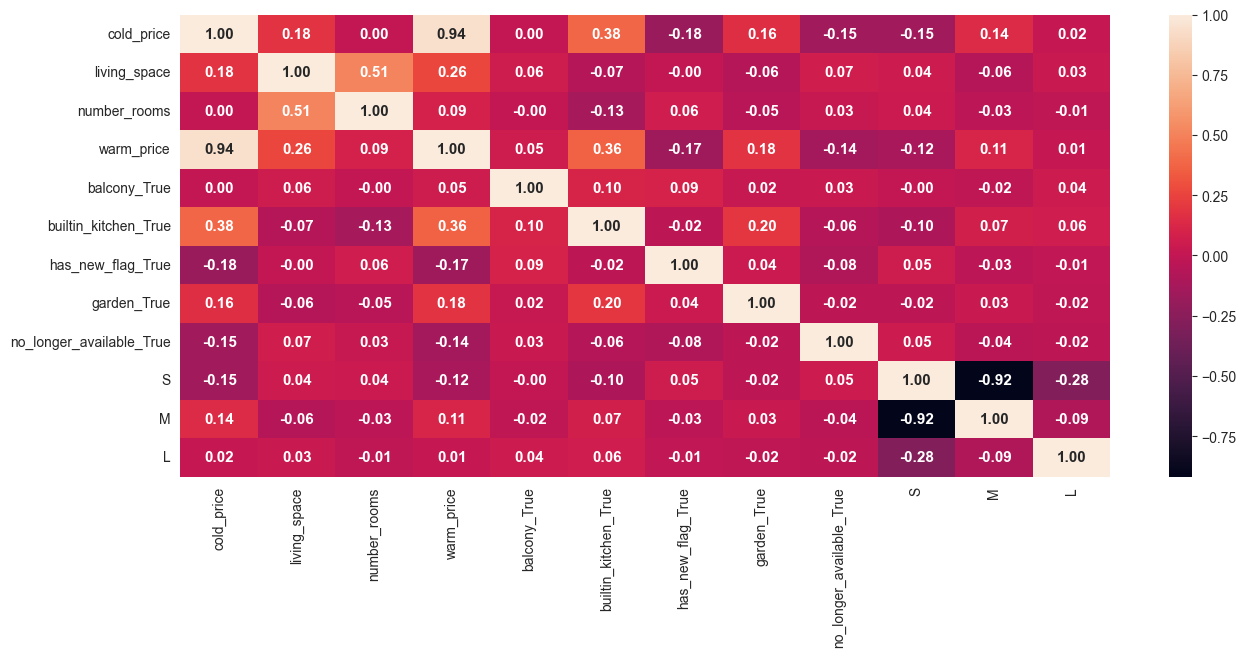

In [51]:
#using spearman correlation to find relationship between two variables for the df new_3
plt.figure(figsize=(15,6))
sns.heatmap(new_3.corr(method='spearman',min_periods=1), annot=True, fmt=".2f", annot_kws={'fontsize':11, 'fontweight':'bold'})

In [52]:
new_3.head()

,cold_price,living_space,number_rooms,warm_price,quarter,time_diff,balcony_True,builtin_kitchen_True,has_new_flag_True,garden_True,no_longer_available_True,S,M,L
0,954.83,63.034656,2,966.603143,Friedrichshain,17 days 14:48:50.236550490,0,0,0,0,1,1,0,0
1,425.98,59.000000,2,630.980000,Neukölln (Neukölln),141 days 16:47:47.552834,1,0,0,0,1,1,0,0
2,769.99,51.980000,2,952.470000,Wedding (Wedding),232 days 08:31:00.345571,1,1,0,0,1,0,1,0
3,949.00,80.000000,2,1139.000000,Friedrichshain (Friedrichshain),147 days 09:27:38.352013,0,0,0,0,1,0,1,0
4,559.96,64.630000,2,735.510000,Kreuzberg (Kreuzberg),112 days 12:04:27.359163,1,0,0,0,1,1,0,0


In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
#Feature Scaling using normalization
scaling1 = MinMaxScaler()

In [55]:
scaling1.fit_transform(new_3[['living_space','number_rooms']])

array([[0.05537177, 0.        ],
       [0.04567308, 0.        ],
       [0.02879808, 0.        ],
       ...,
       [0.07211538, 0.        ],
       [0.04134615, 0.        ],
       [0.06512019, 0.        ]])

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [57]:
#Feature Scaling using standardization
scaling2=StandardScaler()

In [58]:
#using standard scaler for transforming features 
new_4=scaling2.fit_transform(new_3[['living_space','number_rooms']])
new_5 = pd.DataFrame(new_4, columns =['living_area','room_number'])
print(type(new_5))

<class 'pandas.core.frame.DataFrame'>


In [59]:
#combining df with transformed features(new_5) with standard df(new_3) into a new df new_6
new_6=pd.concat([new_3,new_5], axis =1)
new_6

,cold_price,living_space,number_rooms,warm_price,quarter,time_diff,balcony_True,builtin_kitchen_True,has_new_flag_True,garden_True,no_longer_available_True,S,M,L,living_area,room_number
0,954.83,63.034656,2,966.603143,Friedrichshain,17 days 14:48:50.236550490,0,0,0,0,1,1,0,0,-3.914627e-16,-0.439166
1,425.98,59.000000,2,630.980000,Neukölln (Neukölln),141 days 16:47:47.552834,1,0,0,0,1,1,0,0,-2.222832e-01,-0.439166
2,769.99,51.980000,2,952.470000,Wedding (Wedding),232 days 08:31:00.345571,1,1,0,0,1,0,1,0,-6.090394e-01,-0.439166
3,949.00,80.000000,2,1139.000000,Friedrichshain (Friedrichshain),147 days 09:27:38.352013,0,0,0,0,1,0,1,0,9.346797e-01,-0.439166
4,559.96,64.630000,2,735.510000,Kreuzberg (Kreuzberg),112 days 12:04:27.359163,1,0,0,0,1,1,0,0,8.789303e-02,-0.439166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,754.55,59.460000,2,959.920000,Kreuzberg (Kreuzberg),5 days 14:27:00.221004,1,0,1,0,1,1,0,0,-1.969402e-01,-0.439166
1034,799.00,52.390000,2,904.000000,Neukölln (Neukölln),17 days 14:48:50.236550490,0,0,1,0,0,1,0,0,-5.864511e-01,-0.439166
1035,1050.00,70.000000,2,1225.000000,Kreuzberg (Kreuzberg),5 days 11:17:11.223843,0,0,1,0,1,1,0,0,3.837450e-01,-0.439166
1036,915.00,57.200000,2,1043.000000,Neukölln (Neukölln),17 days 14:48:50.236550490,1,0,1,0,0,1,0,0,-3.214515e-01,-0.439166


C:\Users\avanish\AppData\Local\Temp\ipykernel_9680\1509465865.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new_6.corr(method='spearman',min_periods=1), annot=True, fmt=".2f", annot_kws={'fontsize':11, 'fontweight':'bold'})


<AxesSubplot: >

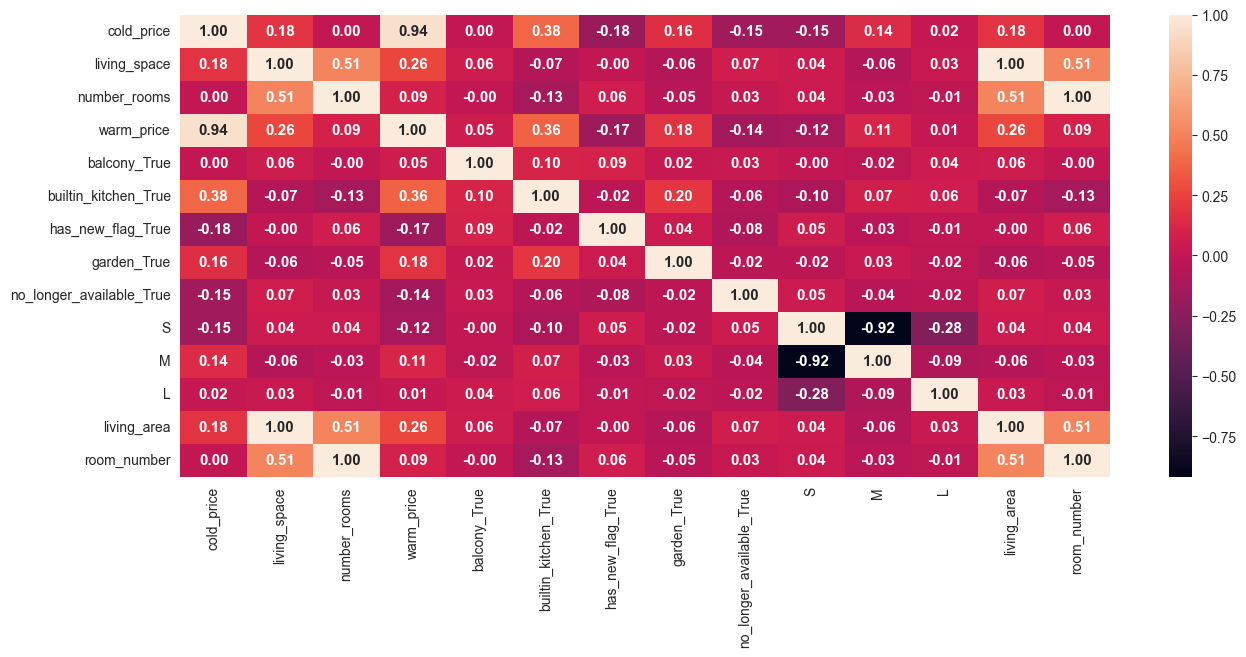

In [60]:
#finding correlation for the df new_6 which contains transformed features
plt.figure(figsize=(15,6))
sns.heatmap(new_6.corr(method='spearman',min_periods=1), annot=True, fmt=".2f", annot_kws={'fontsize':11, 'fontweight':'bold'})

#  Model Implementation

In [88]:
model_columns = ['cold_price', 'living_space', 'number_rooms','balcony_True', 'garden_True', 'builtin_kitchen_True',
                 'has_new_flag_True', 'no_longer_available_True', 'S',
                 'M','L','warm_price']

In [89]:
df_model = new_6[model_columns] #df_model contains only refined features
df_model.head()

,cold_price,living_space,number_rooms,balcony_True,garden_True,builtin_kitchen_True,has_new_flag_True,no_longer_available_True,S,M,L,warm_price
0,954.83,63.034656,2,0,0,0,0,1,1,0,0,966.603143
1,425.98,59.000000,2,1,0,0,0,1,1,0,0,630.980000
2,769.99,51.980000,2,1,0,1,0,1,0,1,0,952.470000
3,949.00,80.000000,2,0,0,0,0,1,0,1,0,1139.000000
4,559.96,64.630000,2,1,0,0,0,1,1,0,0,735.510000


In [90]:
target_var = 'warm_price' #warm_price is our target variable
features_vars = [col for col in df_model.columns if col != target_var] # listing out all the independent features

In [91]:
#Splitting training and testing data
X = df_model[features_vars]
y = df_model[target_var]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
#using linear regression 
reg = LinearRegression()
reg.fit(X_train, y_train);

In [93]:
reg.score(X_test, y_test)

0.8849958910198392

In [67]:
import shap

C:\Users\avanish\AppData\Local\Programs\Python\Python311\Lib\site-packages\shap\utils\_clustering.py:34: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
C:\Users\avanish\AppData\Local\Programs\Python\Python311\Lib\site-packages\shap\utils\_clustering.py:53: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
C:\Users\avanish\AppData\Local\Programs\Python\Pytho

The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.


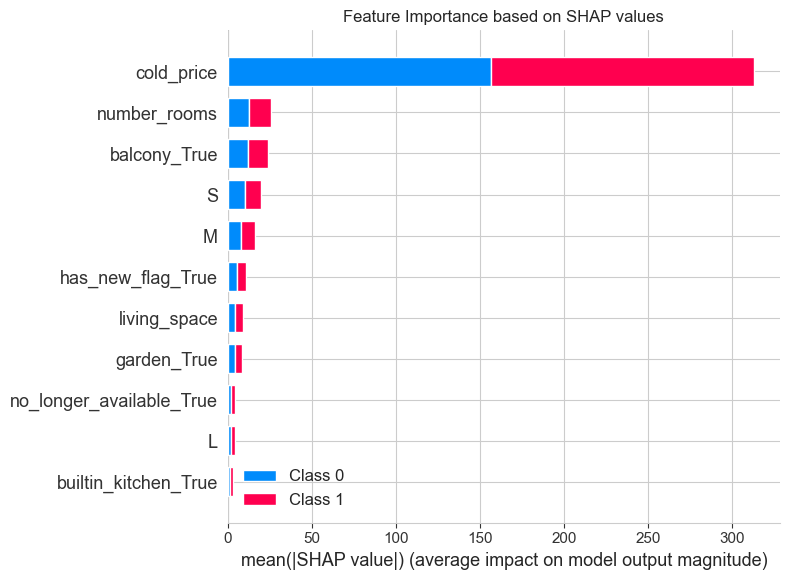

In [68]:
#using SHAP(SHapely Additive exPlanations) to measure feature importance
explainer = shap.LinearExplainer(reg, X)
shap_values = explainer.shap_values(X)
# plt.title('Feature Importance based on SHAP values')
#shap.summary_plot(shap_values, X)
# # print('-------------------------------------------------------------')
plt.title('Feature Importance based on SHAP values')
shap.summary_plot(shap_values, X, plot_type='bar')

In [69]:
#using top 5 features based on Shapely values
imp_columns = ['cold_price','number_rooms','balcony_True','S','M','warm_price']
df_model_new = new_6[imp_columns]
df_model_new.head()

,cold_price,number_rooms,balcony_True,S,M,warm_price
0,954.83,2,0,1,0,966.603143
1,425.98,2,1,1,0,630.980000
2,769.99,2,1,0,1,952.470000
3,949.00,2,0,0,1,1139.000000
4,559.96,2,1,1,0,735.510000


In [78]:
X1= df_model_new.iloc[:, :-1]#X1 contains all columns except the last column warm price
y1= df_model_new.iloc[:, -1]#y1 contains last column warm price
X1.columns
y1.shape

(1038,)

In [79]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [80]:
# implementing decison tree regressor
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(criterion="friedman_mse",
                             max_depth = 10,
                             min_samples_split=10,
                             random_state = 5)
dt_model.fit(X1_train, y1_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=10,
                      min_samples_split=10, random_state=5)

In [81]:
dt_model.score(X1_test, y1_test)

0.8737126046657038

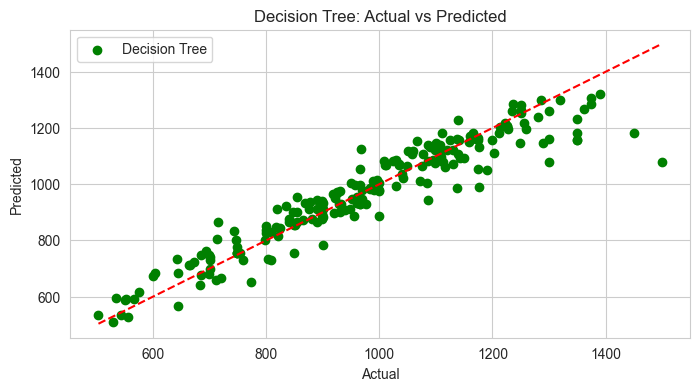

In [83]:
#graphical representation of decision tree prediction output
dt_model_predictions = reg.predict(X2_test)
plt.figure(figsize=(8, 4))
plt.scatter(y1_test,dt_model_predictions, color='green', label='Decision Tree')
plt.plot([min(y1_test), max(y1_test)], [min(y1_test),max(y1_test)], color='red', linestyle = '--')
plt.title('Decision Tree: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

In [74]:
target_var = 'warm_price'
features_vars_imp = [col for col in df_model_new.columns if col != target_var]
X2 = df_model_new[features_vars_imp]
y2 = df_model_new[target_var]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [75]:
#using regression again on the most important features
reg = LinearRegression()
reg.fit(X2_train, y2_train)

LinearRegression()

In [76]:
reg.score(X2_test, y2_test)

0.8889702867557296

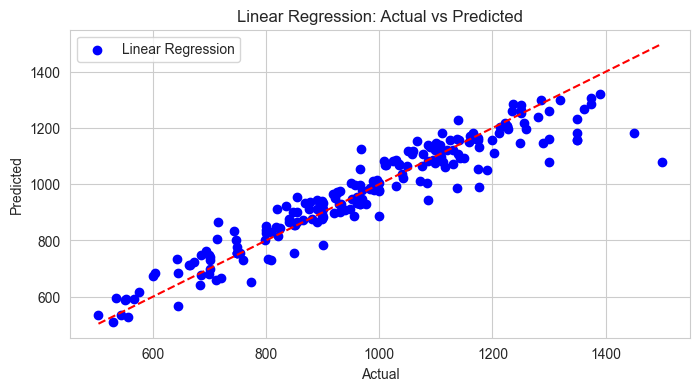

In [77]:
#graphical representation of linear regression prediction output
reg_predictions = reg.predict(X2_test)
plt.figure(figsize=(8, 4))
plt.scatter(y2_test,reg_predictions, color='blue', label='Linear Regression')
plt.plot([min(y2_test), max(y2_test)], [min(y2_test),max(y2_test)], color='red', linestyle = '--')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

In [84]:
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [86]:
#implementing random forest regressor
rf_model = RandomForestRegressor()
rf_model.fit(X2_train,y2_train)
rf_model.score(X2_test, y2_test)

0.8737103157107542

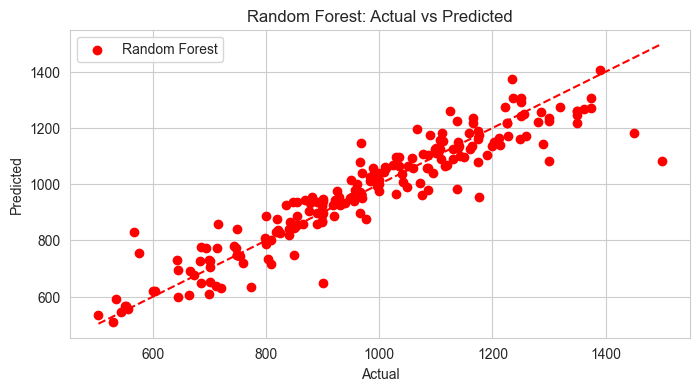

In [100]:
#graphical representation of random forest prediction output
rf_predictions = rf_model.predict(X2_test)
plt.figure(figsize=(8, 4))
plt.scatter(y2_test,rf_predictions, color='red', label='Random Forest')
plt.plot([min(y2_test), max(y2_test)], [min(y2_test),max(y2_test)], color='red', linestyle = '--')
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()


In [94]:
#implementing gradient boosting regressor
gb_model = GradientBoostingRegressor()
gb_model.fit(X2_train,y2_train)
gb_model.score(X2_test, y2_test)

0.8829973805518231

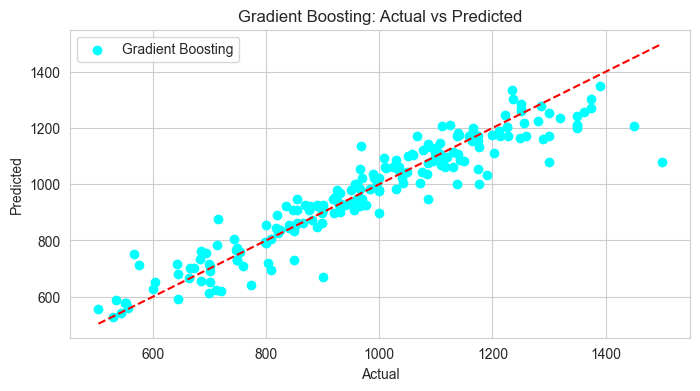

In [95]:
#graphical representation of gradient boosting prediction output
gb_predictions = gb_model.predict(X2_test)
plt.figure(figsize=(8, 4))
plt.scatter(y2_test,gb_predictions, color='cyan', label='Gradient Boosting')
plt.plot([min(y2_test), max(y2_test)], [min(y2_test),max(y2_test)], color='red', linestyle = '--')
plt.title('Gradient Boosting: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()


In [108]:
#Calculating mean squared error and mean absolute error for all the regression models
reg_mse = mean_squared_error(y2_test , reg_predictions)
reg_mae = mean_absolute_error(y2_test , reg_predictions)
dt_mse = mean_squared_error(y1_test , dt_model_predictions)
dt_mae = mean_absolute_error(y1_test , dt_model_predictions)
rf_mse = mean_squared_error(y2_test , rf_predictions)
rf_mae = mean_absolute_error(y2_test , rf_predictions)
gb_mse = mean_squared_error(y2_test , gb_predictions)
gb_mae = mean_absolute_error(y2_test , gb_predictions)

In [109]:
print(f"Linear Regression MSE is: {reg_mse}")
print(f"Linear Regression MAE is: {reg_mae}")
print(f"Decision Tree MSE is: {dt_mse}")
print(f"Decision Tree MAE is: {dt_mae}")
print(f"Random Forest MSE is: {rf_mse}")
print(f"Random Forest MAE is: {rf_mae}")
print(f"Gradient Boosting MSE is: {gb_mse}")
print(f"Gradient Boosting MAE is: {gb_mae}")

Linear Regression MSE is: 4905.0856012362365
Linear Regression MAE is: 48.64322099267126
Decision Tree MSE is: 4905.0856012362365
Decision Tree MAE is: 48.64322099267126
Random Forest MSE is: 5579.242653982242
Random Forest MAE is: 50.39912359524407
Gradient Boosting MSE is: 5168.957454654977
Gradient Boosting MAE is: 49.713716455245546


In [110]:
mse_values = [4905.0856012362365,4905.0856012362365,5579.242653982242,5168.957454654977]
mae_values = [48.64322099267126,48.64322099267126,50.39912359524407,49.713716455245546]
models = ['Linear Regression','Decision Tree','Random Forest','Gradient Boosting']
colors = ['blue', 'green', 'red', 'cyan']

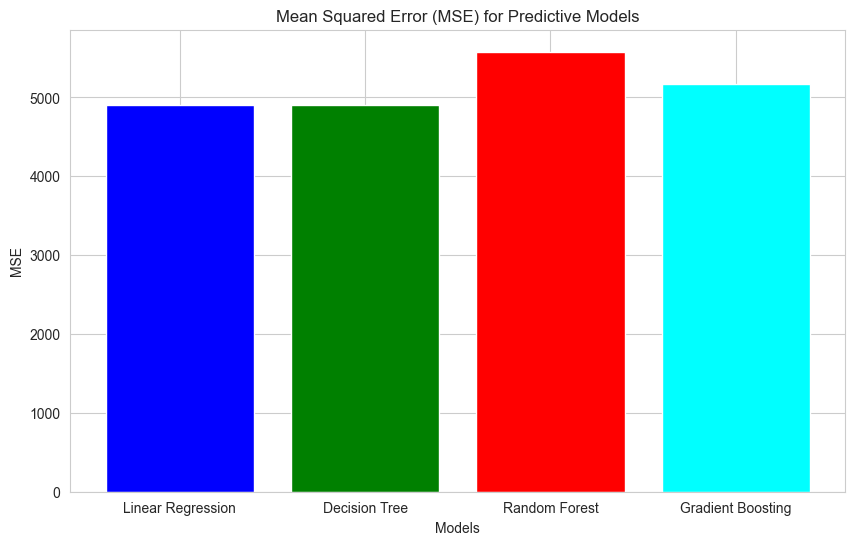

In [112]:
#graphical representation of MSE
plt.figure(figsize=(10,6))
plt.bar(models, mse_values, color=colors)
plt.title('Mean Squared Error (MSE) for Predictive Models')
plt.xlabel('Models')
plt.ylabel('MSE')
# plt.xticks(rotation=45)
plt.show()

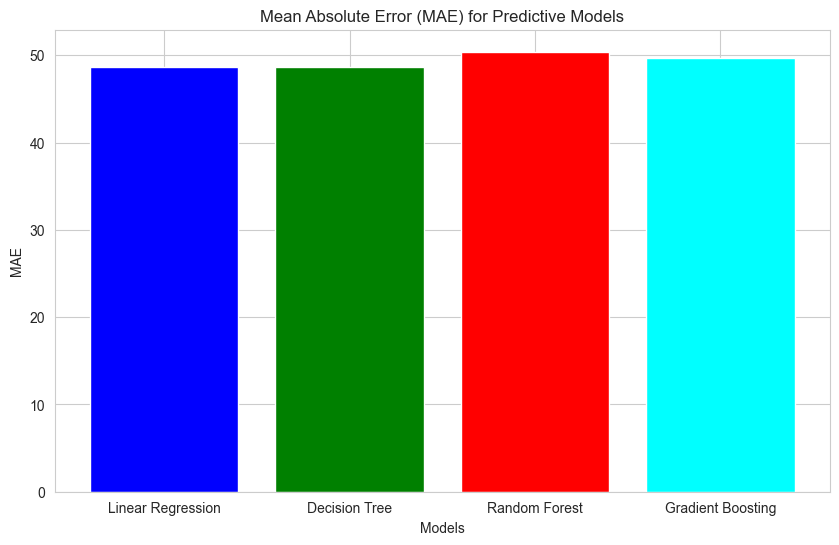

In [107]:
#graphical representation of MAE
plt.figure(figsize=(10,6))
plt.bar(models, mae_values, color=colors)
plt.title('Mean Absolute Error (MAE) for Predictive Models')
plt.xlabel('Models')
plt.ylabel('MAE')
# plt.xticks(rotation=45)
plt.show()